In [25]:
from google.colab import drive
import os

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_features_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import joblib

# Load your dataset
file_path = '/content/drive/MyDrive/archive (7).zip'  # Change path if needed
df = pd.read_csv(file_path)

# Select EEG features (exclude timestamp, labels, and non-EEG columns)
X = df.drop(columns=['TimeStamp', 'InPain', 'Battery', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10'])
y = df['InPain']

# Optional: fill missing values
X.fillna(0, inplace=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [28]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:27:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [29]:
y_pred = xgb_model.predict(X_test)


Accuracy: 0.7692
Confusion Matrix:
 [[ 9  5]
 [ 1 11]]


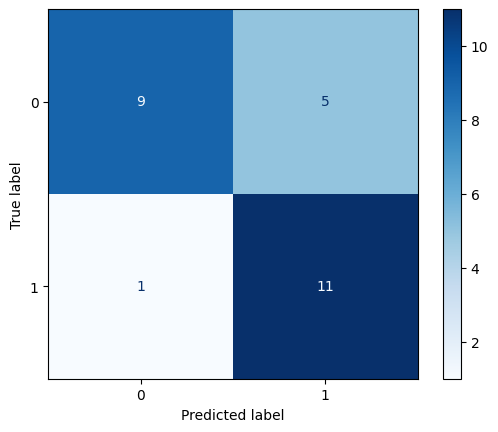

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.69      0.92      0.79        12

    accuracy                           0.77        26
   macro avg       0.79      0.78      0.77        26
weighted avg       0.80      0.77      0.77        26



In [30]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [8]:
!pip install --upgrade xgboost


In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring='f1_macro')
print("5-Fold CV F1 Macro:", scores.mean())


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:29:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:29:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:29:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


5-Fold CV F1 Macro: 0.6682862710448917


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:29:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:29:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


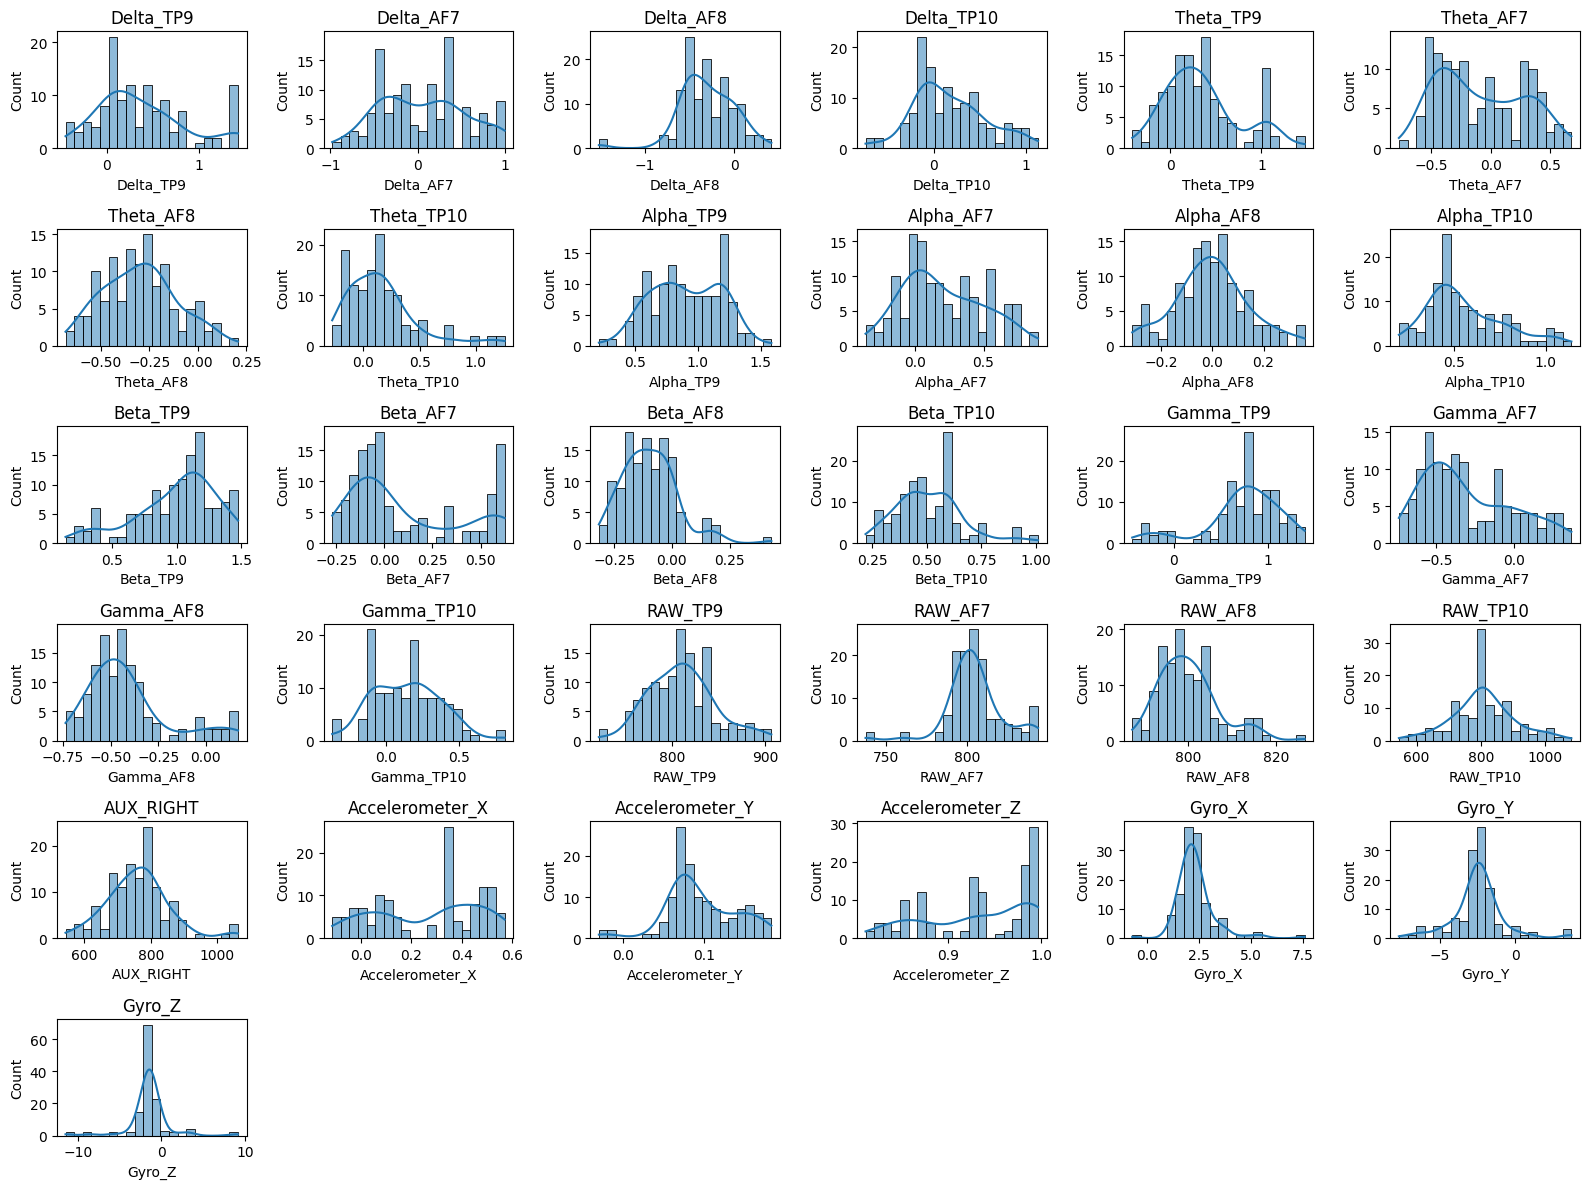

<Figure size 1000x800 with 0 Axes>

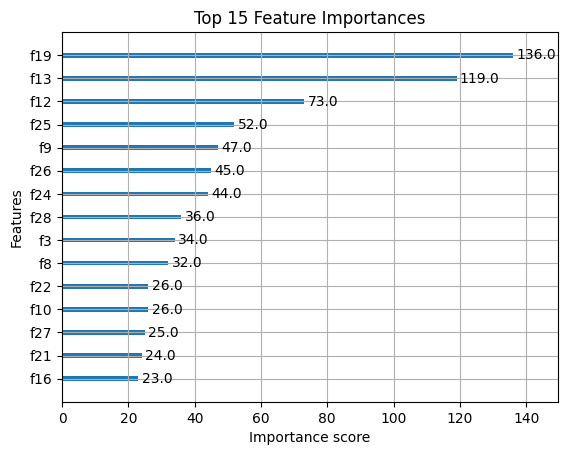

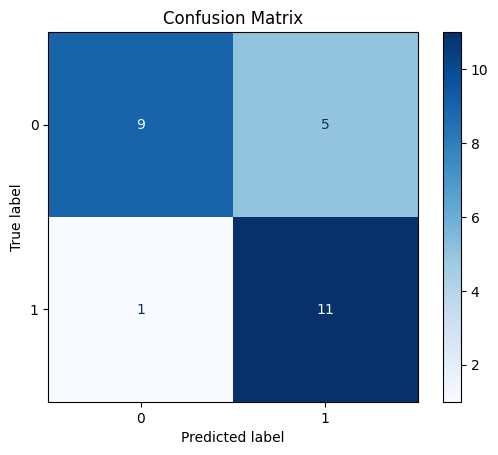

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from xgboost import plot_importance

# ---- 1. Feature distributions ----
plt.figure(figsize=(16,12))
for i, col in enumerate(X.columns):
    plt.subplot(6, 6, i+1)  # Adjust grid based on number of features
    sns.histplot(X[col], kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()



# ---- 3. Feature importance from XGBoost ----
plt.figure(figsize=(10,8))
plot_importance(xgb_model, max_num_features=15, importance_type='weight')
plt.title("Top 15 Feature Importances")
plt.show()

# ---- 4. Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()




In [23]:
import numpy as np

# Check the balance of your labels
class_counts = np.bincount(y)
print(f"Class 0 (Painless) has {class_counts[0]} samples.")
print(f"Class 1 (Painful) has {class_counts[1]} samples.")

Class 0 (Painless) has 21 samples.
Class 1 (Painful) has 24 samples.


In [38]:
!pip install kaggle pandas mne scikit-learn


In [41]:
from google.colab import drive
import os
import tensorflow as tf

# --- Verify GPU is active ---
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found. Please ensure you have selected "GPU" in the Runtime settings.')
else:
  print(f'Found GPU at: {device_name}.')

# --- Mount Drive and Setup Project ---
drive.mount('/content/drive')
project_path = '/content/drive/MyDrive/NeuroPain_Final_Working_Project'
os.makedirs(project_path, exist_ok=True)
os.chdir(project_path)

# --- Install and Import Libraries ---
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow mne antropy joblib xgboost --quiet
import numpy as np
import pandas as pd
import mne
import antropy as ant
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization, MaxPooling1D
import matplotlib.pyplot as plt
import seaborn as sns

mne.set_log_level('WARNING')
print(f"\nProject setup complete in: {project_path}")

Found GPU at: /device:GPU:0.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Project setup complete in: /content/drive/MyDrive/NeuroPain_Final_Working_Project


In [45]:
import zipfile
import pandas as pd

zip_path = '/content/drive/MyDrive/archive (7).zip'
extract_dir = '/content/drive/MyDrive/archive_extracted'

# Extract all contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Now read the file
file_path = f'{extract_dir}/BigOne.txt'
df = pd.read_csv(file_path)

print(df.head())


                 TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0  2023-04-06 16:35:50.448  -0.169969  -0.386626  -0.534743    0.286103   
1  2023-04-06 16:35:52.467   0.240544  -0.166372  -0.137765    0.379532   
2  2023-04-06 16:35:54.496   0.147743   0.904169   0.158794    0.606305   
3  2023-04-06 16:35:56.506   0.147743   0.219221  -0.131303    0.606305   
4  2023-04-06 16:35:58.517  -0.114015  -0.402994  -0.376233   -0.192672   

   Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X  \
0  -0.013301  -0.407140  -0.278992    0.247286   0.652695  ...  2.317810   
1   0.084031  -0.301020  -0.161674    0.248014   0.623820  ...  3.147736   
2   0.243440   0.546902   0.024293    0.152475   0.574272  ...  2.579498   
3   0.243440   0.078326  -0.127102    0.152475   0.574272  ...  3.065491   
4   0.288974  -0.203408  -0.220046    0.076474   0.802903  ...  2.631836   

     Gyro_Y    Gyro_Z  HeadBandOn  HSI_TP9  HSI_AF7  HSI_AF8  HSI_TP10  \
0 -2.706604 -1.958

In [46]:
import pandas as pd
import zipfile

zip_path = '/content/drive/MyDrive/archive (7).zip'

with zipfile.ZipFile(zip_path) as z:
    with z.open('BigOne.txt') as f:
        df = pd.read_csv(f)

print(df.head())


                 TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0  2023-04-06 16:35:50.448  -0.169969  -0.386626  -0.534743    0.286103   
1  2023-04-06 16:35:52.467   0.240544  -0.166372  -0.137765    0.379532   
2  2023-04-06 16:35:54.496   0.147743   0.904169   0.158794    0.606305   
3  2023-04-06 16:35:56.506   0.147743   0.219221  -0.131303    0.606305   
4  2023-04-06 16:35:58.517  -0.114015  -0.402994  -0.376233   -0.192672   

   Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X  \
0  -0.013301  -0.407140  -0.278992    0.247286   0.652695  ...  2.317810   
1   0.084031  -0.301020  -0.161674    0.248014   0.623820  ...  3.147736   
2   0.243440   0.546902   0.024293    0.152475   0.574272  ...  2.579498   
3   0.243440   0.078326  -0.127102    0.152475   0.574272  ...  3.065491   
4   0.288974  -0.203408  -0.220046    0.076474   0.802903  ...  2.631836   

     Gyro_Y    Gyro_Z  HeadBandOn  HSI_TP9  HSI_AF7  HSI_AF8  HSI_TP10  \
0 -2.706604 -1.958

In [47]:
# Keep only EEG columns
eeg_columns = [col for col in df.columns if any(band in col for band in ['Delta','Theta','Alpha','Beta','Gamma'])]
X = df[eeg_columns].values

# Labels
y = df['InPain'].values

print("EEG feature shape:", X.shape)
print("Labels shape:", y.shape)


EEG feature shape: (126, 20)
Labels shape: (126,)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [49]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# Select only EEG columns
eeg_columns = [col for col in df.columns if any(band in col for band in ['Delta','Theta','Alpha','Beta','Gamma'])]
eeg_data = df[eeg_columns]

# Feature extraction
features = []

for col in eeg_columns:
    channel_data = eeg_data[col].values
    features.append(np.mean(channel_data))        # mean
    features.append(np.std(channel_data))         # std
    features.append(np.max(channel_data))         # max
    features.append(np.min(channel_data))         # min
    features.append(skew(channel_data))           # skewness
    features.append(kurtosis(channel_data))       # kurtosis

# Convert to numpy array
X_features = np.array(features).reshape(1, -1)  # if one trial, else loop over trials
y_labels = df['InPain'].values


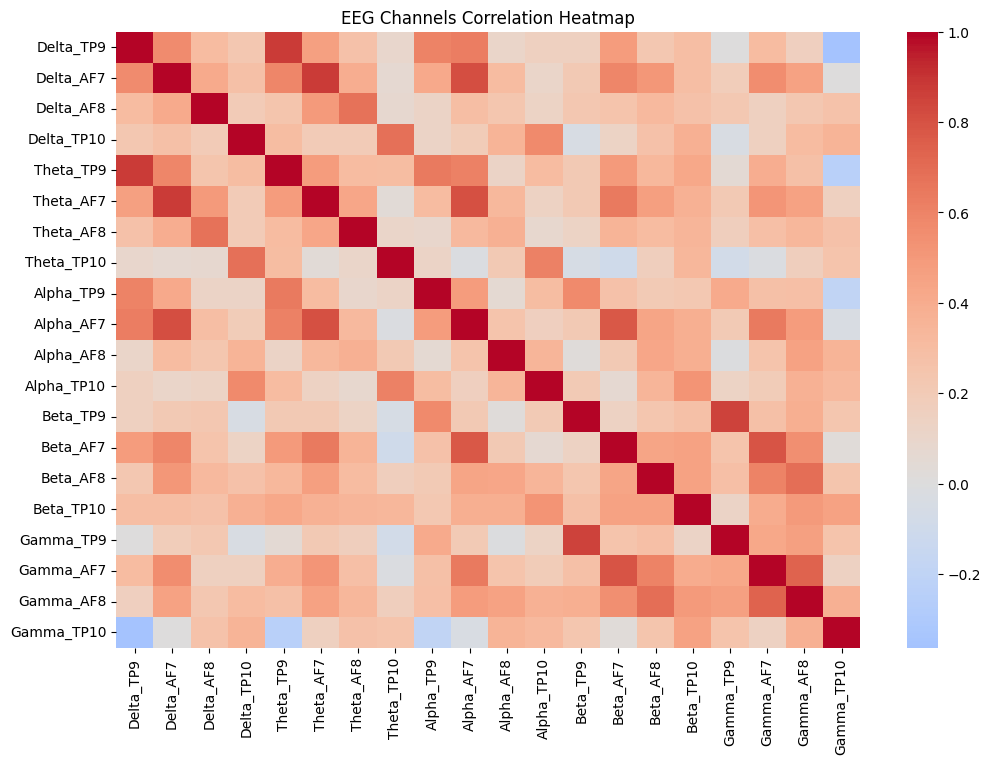

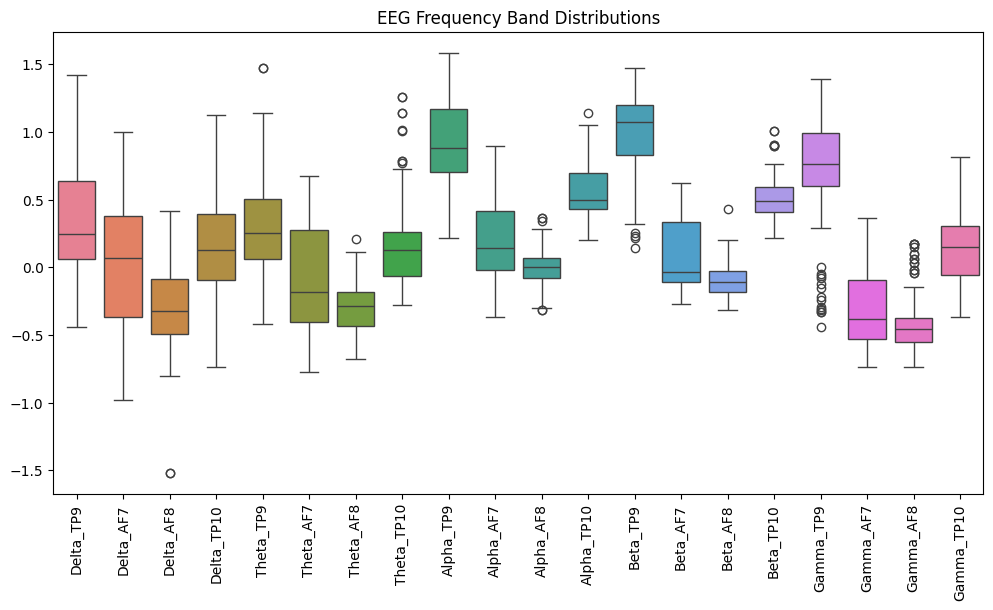

In [50]:

plt.figure(figsize=(12, 8))
sns.heatmap(eeg_data.corr(), cmap='coolwarm', center=0)
plt.title("EEG Channels Correlation Heatmap")
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=eeg_data)
plt.xticks(rotation=90)
plt.title("EEG Frequency Band Distributions")
plt.show()


In [53]:
X_features = np.array(X_features).reshape(1, -1)


/tmp/ipython-input-349378566.py:37: UserWarning: nperseg=256 is greater than signal length max(len(x), len(y)) = 5, using nperseg = 5
  freqs, psd = welch(data, fs=1.0)
/tmp/ipython-input-349378566.py:37: UserWarning: nperseg=256 is greater than signal length max(len(x), len(y)) = 5, using nperseg = 5
  freqs, psd = welch(data, fs=1.0)
/tmp/ipython-input-349378566.py:37: UserWarning: nperseg=256 is greater than signal length max(len(x), len(y)) = 5, using nperseg = 5
  freqs, psd = welch(data, fs=1.0)
/tmp/ipython-input-349378566.py:37: UserWarning: nperseg=256 is greater than signal length max(len(x), len(y)) = 5, using nperseg = 5
  freqs, psd = welch(data, fs=1.0)
/tmp/ipython-input-349378566.py:37: UserWarning: nperseg=256 is greater than signal length max(len(x), len(y)) = 5, using nperseg = 5
  freqs, psd = welch(data, fs=1.0)
/tmp/ipython-input-349378566.py:37: UserWarning: nperseg=256 is greater than signal length max(len(x), len(y)) = 5, using nperseg = 5
  freqs, psd = welch(

              precision    recall  f1-score   support

    Painless       0.73      0.85      0.79        13
     Painful       0.80      0.67      0.73        12

    accuracy                           0.76        25
   macro avg       0.77      0.76      0.76        25
weighted avg       0.77      0.76      0.76        25



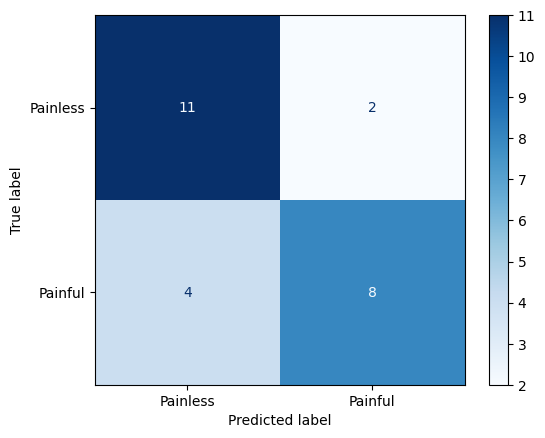

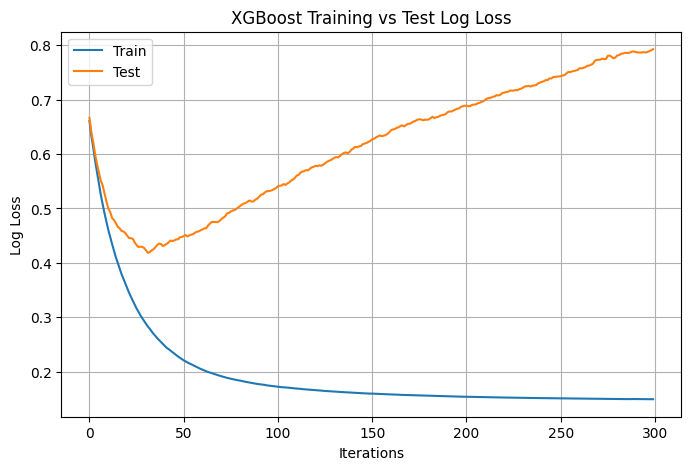

<Figure size 1000x600 with 0 Axes>

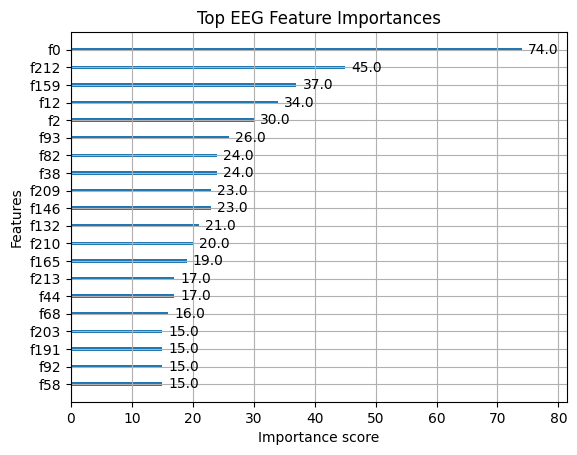

In [55]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import welch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import zipfile

# Load dataset
zip_path = '/content/drive/MyDrive/archive (7).zip'
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('BigOne.txt') as f:
        df = pd.read_csv(f)

# EEG channel columns
eeg_cols = [col for col in df.columns if any(b in col for b in ['Delta','Theta','Alpha','Beta','Gamma'])]

# Sliding window size (in rows, adjust as needed)
window_size = 5
step_size = 1

X_features = []
y_labels = []

for start in range(0, len(df)-window_size+1, step_size):
    window = df.iloc[start:start+window_size]
    window_features = []

    for col in eeg_cols:
        data = window[col].values
        window_features.extend([np.mean(data), np.std(data), np.min(data), np.max(data), skew(data), kurtosis(data)])

        # Frequency band power using Welch
        freqs, psd = welch(data, fs=1.0)
        for band, (low, high) in {'Delta':(0.5,4), 'Theta':(4,8), 'Alpha':(8,13), 'Beta':(13,30), 'Gamma':(30,45)}.items():
            idx = np.logical_and(freqs >= low, freqs <= high)
            power = np.sum(psd[idx])
            window_features.append(power)

    X_features.append(window_features)
    # Majority label in window
    y_labels.append(int(window['InPain'].mode()[0]))

X_features = np.array(X_features)
y_labels = np.array(y_labels)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.85,
    colsample_bytree=0.85,
    random_state=42,
    eval_metric='logloss'
)

eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Painless','Painful']))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Painless','Painful'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
plt.figure(figsize=(8,5))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training vs Test Log Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plot_importance(model, max_num_features=20)
plt.title("Top EEG Feature Importances")
plt.show()


/tmp/ipython-input-349378566.py:37: UserWarning: nperseg=256 is greater than signal length max(len(x), len(y)) = 5, using nperseg = 5
  freqs, psd = welch(data, fs=1.0)
/tmp/ipython-input-349378566.py:37: UserWarning: nperseg=256 is greater than signal length max(len(x), len(y)) = 5, using nperseg = 5
  freqs, psd = welch(data, fs=1.0)
/tmp/ipython-input-349378566.py:37: UserWarning: nperseg=256 is greater than signal length max(len(x), len(y)) = 5, using nperseg = 5
  freqs, psd = welch(data, fs=1.0)
/tmp/ipython-input-349378566.py:37: UserWarning: nperseg=256 is greater than signal length max(len(x), len(y)) = 5, using nperseg = 5
  freqs, psd = welch(data, fs=1.0)
/tmp/ipython-input-349378566.py:37: UserWarning: nperseg=256 is greater than signal length max(len(x), len(y)) = 5, using nperseg = 5
  freqs, psd = welch(data, fs=1.0)
/tmp/ipython-input-349378566.py:37: UserWarning: nperseg=256 is greater than signal length max(len(x), len(y)) = 5, using nperseg = 5
  freqs, psd = welch(

              precision    recall  f1-score   support

    Painless       0.73      0.85      0.79        13
     Painful       0.80      0.67      0.73        12

    accuracy                           0.76        25
   macro avg       0.77      0.76      0.76        25
weighted avg       0.77      0.76      0.76        25



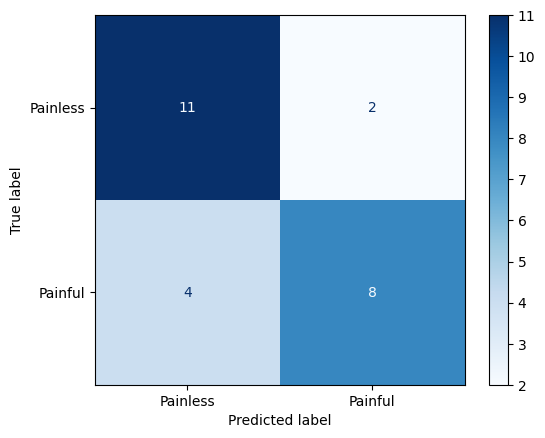

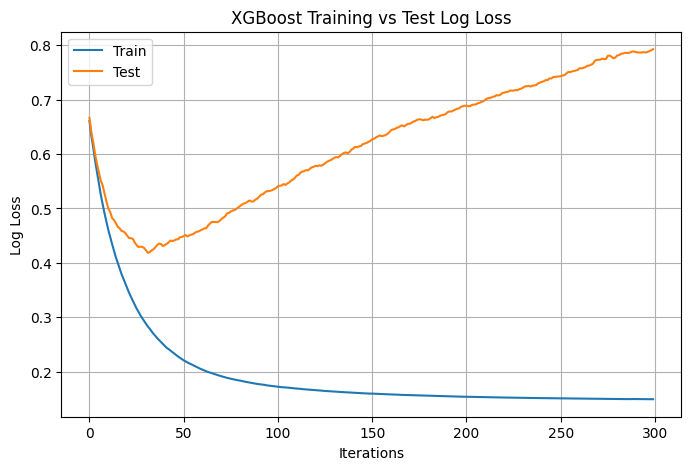

<Figure size 1000x600 with 0 Axes>

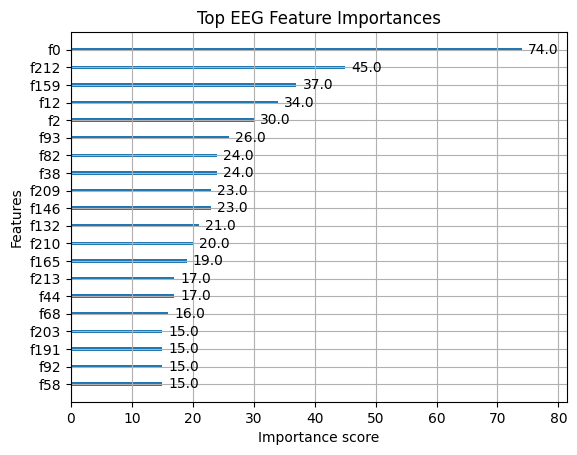

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import welch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import zipfile

# Load dataset
zip_path = '/content/drive/MyDrive/archive (7).zip'
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('BigOne.txt') as f:
        df = pd.read_csv(f)

# EEG channel columns
eeg_cols = [col for col in df.columns if any(b in col for b in ['Delta','Theta','Alpha','Beta','Gamma'])]

# Sliding window size (in rows, adjust as needed)
window_size = 5
step_size = 1

X_features = []
y_labels = []

for start in range(0, len(df)-window_size+1, step_size):
    window = df.iloc[start:start+window_size]
    window_features = []

    for col in eeg_cols:
        data = window[col].values
        window_features.extend([np.mean(data), np.std(data), np.min(data), np.max(data), skew(data), kurtosis(data)])

        # Frequency band power using Welch
        freqs, psd = welch(data, fs=1.0)
        for band, (low, high) in {'Delta':(0.5,4), 'Theta':(4,8), 'Alpha':(8,13), 'Beta':(13,30), 'Gamma':(30,45)}.items():
            idx = np.logical_and(freqs >= low, freqs <= high)
            power = np.sum(psd[idx])
            window_features.append(power)

    X_features.append(window_features)
    # Majority label in window
    y_labels.append(int(window['InPain'].mode()[0]))

X_features = np.array(X_features)
y_labels = np.array(y_labels)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.85,
    colsample_bytree=0.85,
    random_state=42,
    eval_metric='logloss'
)

eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Painless','Painful']))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Painless','Painful'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
plt.figure(figsize=(8,5))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training vs Test Log Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plot_importance(model, max_num_features=20)
plt.title("Top EEG Feature Importances")
plt.show()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 10, 20)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 10, 64)    │      3,904 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 64)    │        256 │ conv1d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_7     │ (None, 5, 64)     │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 5, 128)    │     24,704 │ max_pooling1d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 5, 128)    │        512 │ conv1d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_8     │ (None, 2, 128)    │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ max_pooling1d_8[… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 128)    │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1, 16)     │      2,048 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1, 128)    │      2,048 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 2, 128)    │          0 │ max_pooling1d_8[… │
│                     │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 64)        │     49,408 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32)        │      2,080 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │         33 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 84,993 (332.00 KB)

 Trainable params: 84,609 (330.50 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
3/3 - 4s - 1s/step - accuracy: 0.6882 - loss: 0.6584 - val_accuracy: 0.8750 - val_loss: 0.6451
Epoch 2/50
3/3 - 0s - 32ms/step - accuracy: 0.8710 - loss: 0.5173 - val_accuracy: 0.7917 - val_loss: 0.6041
Epoch 3/50
3/3 - 0s - 31ms/step - accuracy: 0.9140 - loss: 0.3981 - val_accuracy: 0.7500 - val_loss: 0.5591
Epoch 4/50
3/3 - 0s - 31ms/step - accuracy: 0.9140 - loss: 0.3199 - val_accuracy: 0.7500 - val_loss: 0.5126
Epoch 5/50
3/3 - 0s - 30ms/step - accuracy: 0.9247 - loss: 0.2581 - val_accuracy: 0.7917 - val_loss: 0.4673
Epoch 6/50
3/3 - 0s - 31ms/step - accuracy: 0.9355 - loss: 0.2077 - val_accuracy: 0.7917 - val_loss: 0.4310
Epoch 7/50
3/3 - 0s - 35ms/step - accuracy: 0.9032 - loss: 0.1785 - val_accuracy: 0.7500 - val_loss: 0.4007
Epoch 8/50
3/3 - 0s - 33ms/step - accuracy: 0.9032 - loss: 0.1586 - val_accuracy: 0.7917 - val_loss: 0.3733
Epoch 9/50
3/3 - 0s - 32ms/step - accuracy: 0.9247 - loss: 0.1436 - val_accuracy: 0.7917 - val_loss: 0.3552
Epoch 10/50
3/3 - 0s - 31ms/st

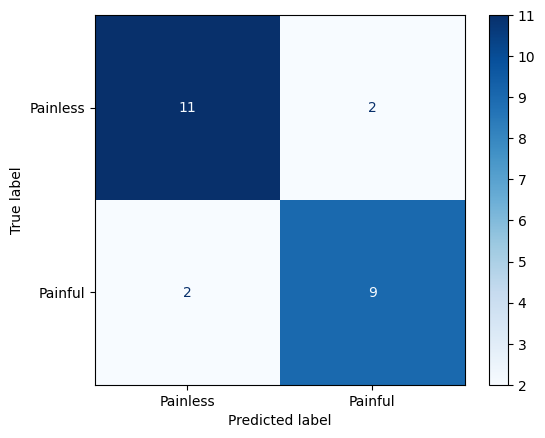

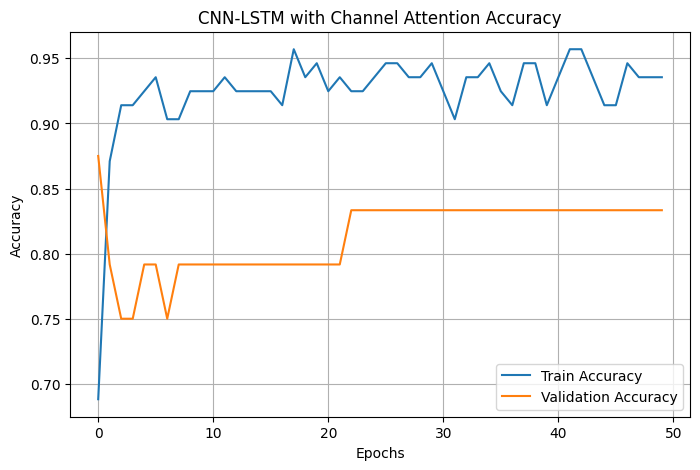

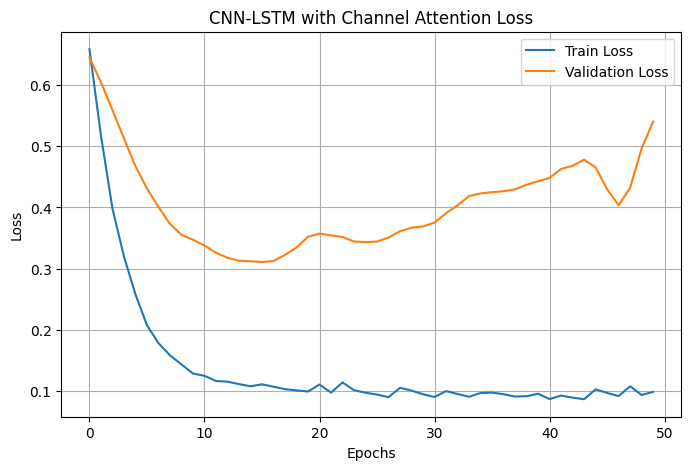

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Multiply, GlobalAveragePooling1D, Reshape
from tensorflow.keras import backend as K

# --- Load Dataset ---
zip_path = '/content/drive/MyDrive/archive (7).zip'
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('BigOne.txt') as f:
        df = pd.read_csv(f)

eeg_cols = [col for col in df.columns if any(b in col for b in ['Delta','Theta','Alpha','Beta','Gamma'])]

window_size = 10
step_size = 1
num_channels = len(eeg_cols)

X_seq = []
y_seq = []

for start in range(0, len(df)-window_size+1, step_size):
    window = df.iloc[start:start+window_size][eeg_cols].values
    X_seq.append(window)
    y_seq.append(int(df.iloc[start:start+window_size]['InPain'].mode()[0]))

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# --- Scaling ---
scaler = StandardScaler()
X_scaled = X_seq.reshape(-1, num_channels)
X_scaled = scaler.fit_transform(X_scaled)
X_scaled = X_scaled.reshape(-1, window_size, num_channels)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_seq, test_size=0.2, random_state=42, stratify=y_seq
)

# --- FIXED CHANNEL ATTENTION ---
def channel_attention(inputs, ratio=8):
    channel = int(inputs.shape[-1])

    avg_pool = GlobalAveragePooling1D()(inputs)  # instead of tf.reduce_mean
    avg_pool = Reshape((1, channel))(avg_pool)

    dense1 = Dense(channel // ratio, activation='relu', use_bias=False)(avg_pool)
    dense2 = Dense(channel, activation='sigmoid', use_bias=False)(dense1)

    scale = Multiply()([inputs, dense2])
    return scale

# --- Model Architecture ---
inp = Input(shape=(window_size, num_channels))

x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(inp)
x = BatchNormalization()(x)
x = MaxPooling1D(2)(x)

x = Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(2)(x)

x = channel_attention(x)  # ✅ fixed attention

x = LSTM(64)(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
out = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# --- Train ---
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=2
)

# --- Evaluation ---
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=['Painless','Painful']))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Painless','Painful'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# --- Plot Accuracy and Loss ---
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN-LSTM with Channel Attention Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN-LSTM with Channel Attention Loss')
plt.legend()
plt.grid(True)
plt.show()


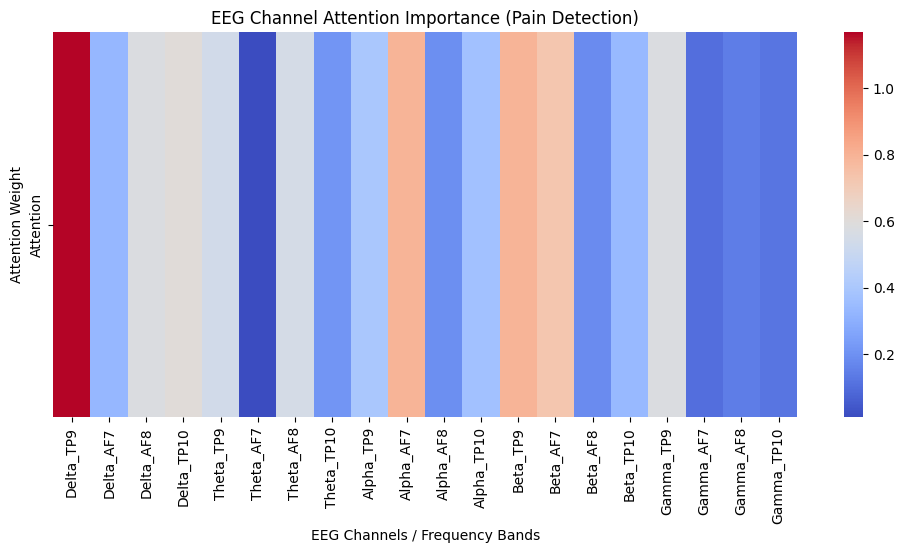

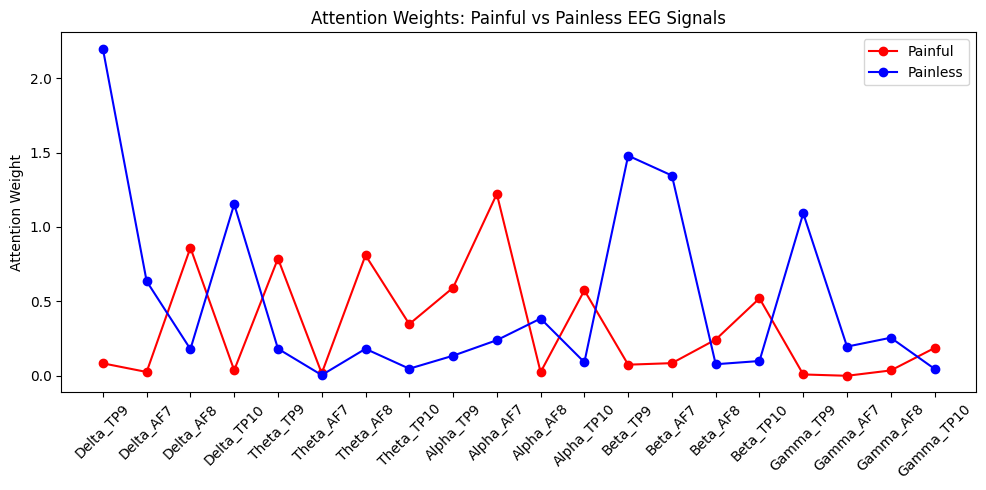

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Model

# Extract actual EEG channel names dynamically
channel_names = [c for c in df.columns if any(band in c for band in ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])]
n_channels = len(channel_names)

# Build a clean sub-model for attention visualization
dense_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Dense)]
attention_layer = dense_layers[-2]  # usually the SE block Dense layer
attention_model = Model(inputs=model.input, outputs=attention_layer.output)

# Avoid retracing: wrap predict in a TensorFlow function
@tf.function(reduce_retracing=True)
def get_attention(x):
    return attention_model(x)

# Compute attention activations
attention_output = attention_model.predict(X_test, verbose=0)
avg_attention = np.mean(attention_output, axis=0).flatten()[:n_channels]

plt.figure(figsize=(12, 5))
sns.heatmap(avg_attention.reshape(1, -1), cmap="coolwarm",
            xticklabels=channel_names, yticklabels=["Attention"])
plt.title("EEG Channel Attention Importance (Pain Detection)")
plt.xlabel("EEG Channels / Frequency Bands")
plt.ylabel("Attention Weight")
plt.show()

# Painful vs Painless Attention Comparison
painful_idx = np.where(y_test == 1)[0][:10]
painless_idx = np.where(y_test == 0)[0][:10]

painful_attention = np.mean(attention_model.predict(X_test[painful_idx], verbose=0), axis=0).flatten()[:n_channels]
painless_attention = np.mean(attention_model.predict(X_test[painless_idx], verbose=0), axis=0).flatten()[:n_channels]

plt.figure(figsize=(10, 5))
plt.plot(channel_names, painful_attention, label="Painful", marker='o', color='r')
plt.plot(channel_names, painless_attention, label="Painless", marker='o', color='b')
plt.xticks(rotation=45)
plt.ylabel("Attention Weight")
plt.title("Attention Weights: Painful vs Painless EEG Signals")
plt.legend()
plt.tight_layout()
plt.show()


In [66]:
import os
print(os.path.exists('/content/drive/MyDrive/best_eeg_model.h5'))


True


In [67]:
app_code = r'''
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model, Model
import matplotlib.pyplot as plt

st.set_page_config(page_title="EEG Pain Classifier", layout="wide")
st.title("EEG Pain Classifier (Streamlit)")

model_path = "/content/drive/MyDrive/best_eeg_model.h5"
model = load_model(model_path, compile=False)

# try to extract attention (optional)
attention_model = None
try:
    attention_model = Model(inputs=model.input, outputs=model.get_layer('multiply').output)
except Exception:
    pass

uploaded = st.file_uploader("Upload EEG as .npy (shape: timesteps x channels) or skip to use random", type=["npy"])
if uploaded:
    arr = np.load(uploaded)
    if arr.ndim == 2:
        eeg = np.expand_dims(arr, axis=0)
    else:
        eeg = arr
else:
    timesteps = st.slider("time steps", 50, 500, 200)
    channels = st.slider("channels", 4, 32, 16)
    eeg = np.random.rand(1, timesteps, channels)

if st.button("Predict"):
    pred = model.predict(eeg)
    conf = float(pred[0][0])
    label = "Painful" if conf > 0.5 else "Painless"
    st.metric("Prediction", label, f"{conf:.3f}")
    if attention_model is not None:
        att = attention_model.predict(eeg)
        att_weights = np.mean(att[0], axis=0)
        st.bar_chart(att_weights)
    else:
        st.info("No attention layer detected in model.")
'''
with open('app.py','w') as f:
    f.write(app_code)
print("Wrote app.py")


Wrote app.py


In [78]:
%%writefile neuro_pain_app.py
import streamlit as st
import numpy as np
import joblib

st.title("NeuroPain EEG Prediction")

# Load pre-trained model
model = joblib.load("xgboost_pain_model.joblib")

st.markdown("""
Enter EEG feature values below (one row per trial).
You can enter multiple trials by separating values with commas.
""")

# Example: assume 16 features extracted from EEG
num_features = 16
input_data = []

for i in range(num_features):
    val = st.text_input(f"Feature {i+1}", value="0.0")
    input_data.append(float(val))

# Convert to 2D array for prediction
X_input = np.array(input_data).reshape(1, -1)

if st.button("Predict Pain"):
    prediction = model.predict(X_input)[0]
    if prediction == 1:
        st.success("Predicted Pain State: PAINFUL 😖")
    else:
        st.success("Predicted Pain State: PAINLESS 🙂")


Writing neuro_pain_app.py


In [68]:
!pip install -q streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 135.1 MB/s eta 0:00:00


In [71]:
NGROK_TOKEN = "34bh1fisov0u1pp6fhiFMvJT3vC_64TUHWwfm54pxKgTFhv41"  # replace with your copied token
from pyngrok import ngrok
ngrok.set_auth_token(NGROK_TOKEN)


In [72]:
public_url = ngrok.connect(8501, bind_tls=True).public_url
public_url


'https://compulsory-hazardously-yaretzi.ngrok-free.dev'

In [73]:
!pip install streamlit pyngrok


In [74]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
